
TP 1 - Classifier comparison

(1) commentez les librairies utilisées

(2) commentez les méthodes d'apprentissage

(3) Expliquez les hyper-paramètres de la classification

(4) Expliquez la génération des données

(5) Quelle est la taille de l'ensemble d'entrainement et de tests.
Faites varier la taille de l'ensemble d'apprentissage à 90%.
Quel est le résultat par rapport à la taille actuelle de l'ensemble d'apprentissage ?

(6) Expliquez les itérations sur les ensembles de données

(7) expliquez les itérations sur les classifieurs

(8) enrichissez les méthodes d'apprentissage par : QuadraticDiscriminantAnalysis, Naive Bayes, AdaBoost, Gaussian Process, Nearest Neighbors

(9) affichez les matrices de confusion pour chacune des méthodes d'apprentissage



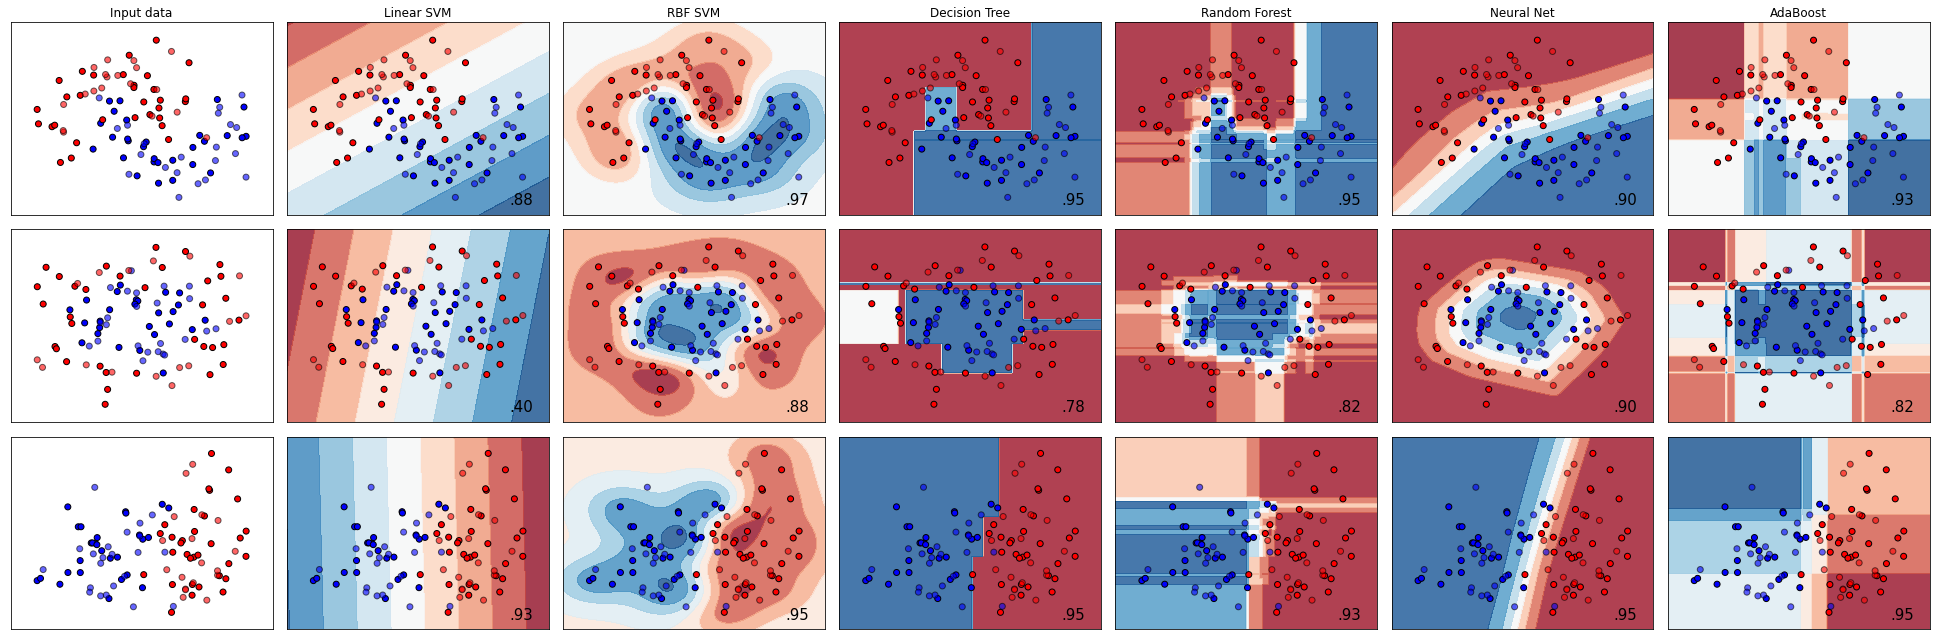

In [1]:
# apprentissage supervidé

# 1 librairies

# 2 créations données

# 3 split les données

# 4 entraînement (ex SVM) => modèles

# 5 test, matrice de confusion

# 6 scoring

"""
=============================
TP 1 - Classifier comparison
=============================

(1) commentez les librairies utilisées

(2) commentez les méthodes d'apprentissage

(3) Expliquez les hyper-paramètres de la classification

(4) Expliquez la génération des données

(5) Quelle est la taille de l'ensemble d'entrainement et de tests.
Faites varier la taille de l'ensemble d'apprentissage à 90%.
Quel est le résultat par rapport à la taille actuelle de l'ensemble d'apprentissage ?

(6) Expliquez les itérations sur les ensembles de données

(7) expliquez les itérations sur les classifieurs

(8) enrichissez les méthodes d'apprentissage par : QuadraticDiscriminantAnalysis, Naive Bayes, AdaBoost, Gaussian Process, Nearest Neighbors

(9) affichez les matrices de confusion pour chacune des méthodes d'apprentissage
"""
print(__doc__)

# (1)

# Nous chercherons à afficher et manipuler des données, nous importons numpy afin de pouvoir les manipuler à travers des vecteurs et matplotlib afin de les afficher de manière claire et visuelle
# Nous chercherons à utiliser diverses méthodes d'apprentissage, c'est ce à quoi va servir la librairie sklearn.
# Le module model_selection de sklearn servira à disposer nos données. Ici avec train_test_split, soit on dispose en train, qui servira à l'apprentissage, soit en test, qui servira ensuite aux tests
# Le module preprocessing de sklearn servira à ajuster les données dans un format dans lequel on pourra mieux le traiter par la suite
# Le module datasets de sklearn servira à rassembler, regrouper les données en diverses classes
# Le module neural_network de sklearn correspondra à la méthode d'apprentissage des réseaux de neurones (vu en question 2)
# Le module svm de sklearn correspondra à la méthode d'apprentissage SVM (vu en question 2)
# Le module tree de sklearn correspondra à la méthode d'apprentissage des arbres de décisions (vu en question 2)
# Le module ensemble de sklearn correspondra à la méthode d'apprentissage à base d'ensemble, comme par exemple les forets aléatoires (vu en question 2)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



h = .02  # step size in the mesh

names = ["Linear SVM",
         "RBF SVM",
         "Decision Tree",
         "Random Forest",
         "Neural Net",
         "AdaBoost"]

# (2)
# Explication de Linear SVM
# L'objectif sera de trouver une droite en X et Y qui séparera l'ensemble de données afin d'optimiser l'espace

# Explication de RBF SVM
# Même principe que Linear SVM mais se permettra des courbes et plus seulement des droites


# Explication de Decision Tree
# L'arbre de décision prendra les valeurs de variables et en constatera des résultats, il utilisera le rapport entre les valeur de variable et leur résultat afin d'apprendre  

# Explication de Random Forest

# Explication de Neural Net
# Couche de neurones appliquant opération simple avec des poids, qui varieront durant l'apprentissage, 
# dont les résultats seront communiqués à d'autres afin d'atteindre à résultat optimal. Utile quand nombre élevé de données

# Explication de AdaBoost

## Ensemble de nos méthodes d'apprentissage
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier()]

# (3)
# n_features : correspond à
# n_redundant : correspond à
# n_informative : correspond à
# random_state : correspond à
# n_clusters_per_class : correspond à 
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# (4)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# (5) 
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

# (6)

figure = plt.figure(figsize=(27, 9))
i = 1
# (6) iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

# (7) iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()
